#### Memuat Data dan Pustaka

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import csv

In [2]:
filename = 'LogData_31-10-2020_05.45.08__stanley.csv'
with open(filename, 'r') as f:
    data_log = list(csv.reader(f, delimiter=','))
    print("CSV header:")
    print(data_log[0])
    
data_log = np.array(data_log[1:], dtype=np.float)
# print('First',data_log[1])
# print('Shape',data_log.shape)

CSV header:
['step', 'rate', 'time', 'speed', 'throttle', 'brake', 'steer', 'x', 'y', 'yaw', 'idx', 'ev', 'elat', 'eyaw', 'sp_x', 'sp_y', 'sp_yaw', 'sp_v', 'sp_curvature']


In [3]:
# Import waypoint and plot it
waypoint = np.load('../waypoints_interpolated.npy')

## Galat Lateral
### Perbandingan Aktual dan Referensi

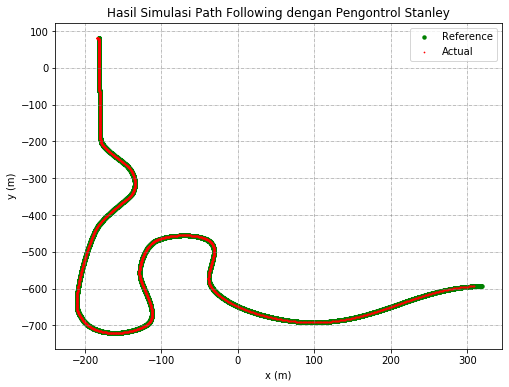

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(waypoint[:,0], waypoint[:,1], s=20, c='g', linewidths=0, label='Reference')
plt.scatter(data_log[:,7], data_log[:,8], s=3, c='r', linewidths=0, label='Actual')
plt.legend(loc='upper right')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(color='grey', linestyle='-.', linewidth=0.5)
# plt.arrow(150.,-150.,0.,100.)
# plt.annotate("Utara", xy=(155, -100))
plt.title('Hasil Simulasi Path Following dengan Pengontrol Stanley')
plt.show()

### Grafik Nilai Galat

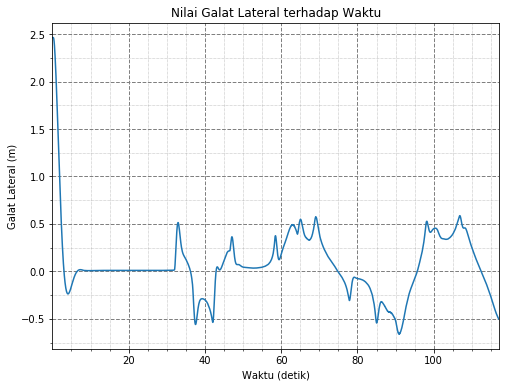

In [5]:
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[:,2],data_log[:,12])
plt.xlim(np.min(data_log[:,2]),np.max(data_log[:,2]))
plt.title('Nilai Galat Lateral terhadap Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Galat Lateral (m)')
gr.yaxis.set_minor_locator(MultipleLocator(0.25))
gr.xaxis.set_minor_locator(MultipleLocator(5))
gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')
# gr.axvline(3.109, linestyle='--', color='k') # vertical line to mark settling time and rise time
plt.show()

### Indeks Performansi

In [6]:
# Index of the calculated variable in data_log
idx = 12
idx_s = 0
idx_e = len(data_log[:, idx])

# Integral Absolute Error
iae = np.sum(data_log[idx_s:idx_e, idx])
print('IAE =', iae)

# Integral Square Error
ise = np.sum(np.square(data_log[idx_s:idx_e, idx]))
print('ISE =', ise)

# Integral Time Absolute Error
itae = np.sum(np.abs(data_log[idx_s:idx_e, idx]) * data_log[idx_s:idx_e, 2])
print('ITAE =', itae)

# Rise Time
rt_idx = 0
k = idx_s
for j in range(len(data_log[idx_s:idx_e, idx]) - 1):
    i = k + j
    if ((data_log[i, idx] * data_log[i+1, idx]) < 0):
        rt_idx = i
        break
print('Rise time =', data_log[i,2])

# Settling Time
ts = 0
ts1 = 0
ts2 = 0
settling_threshold = 0.3
k = idx_s
for j in range(len(data_log[:580,12]) - 1):
    i = j + k
    if (data_log[i, idx] > 0):
        if (data_log[i+1, idx] > data_log[i, idx]):
            ts1 = i
        else:
            if i > (ts1+3) and data_log[ts1, idx] < settling_threshold:
                ts = ts1
                break
    if (data_log[i, idx] < 0):
        if (data_log[i+1, idx] < data_log[i, idx]):
            ts2 = i
        else:
            if i > (ts2+3) and data_log[ts2, idx] > settling_threshold:
                ts = ts2
                break
if ts > 0:
    print('Settling time =',data_log[ts, 2])
else:
    print('Settling time = (not found)')

IAE = 252.4577436424463
ISE = 497.6210877460558
ITAE = 53822.03972272945
Rise time = 3.019
Settling time = 7.276


## Galat Orientasi
### Perbandingan Aktual dan Referensi

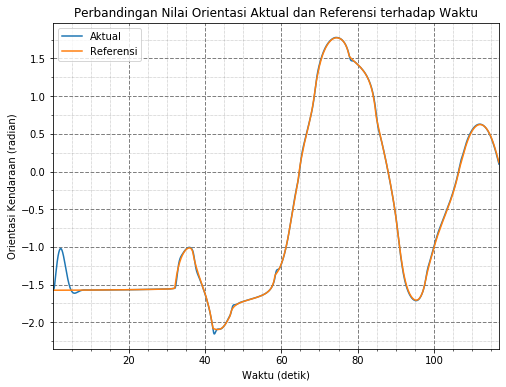

In [7]:
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[:,2], data_log[:,9], label='Aktual')
gr.plot(data_log[:,2], data_log[:,16], label='Referensi')
plt.legend(loc='upper left')
gr.yaxis.set_minor_locator(MultipleLocator(0.25))
gr.xaxis.set_minor_locator(MultipleLocator(5))
gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')
plt.xlim(np.min(data_log[:,2]),np.max(data_log[:,2]))
plt.xlabel('Waktu (detik)')
plt.ylabel('Orientasi Kendaraan (radian)')
plt.title('Perbandingan Nilai Orientasi Aktual dan Referensi terhadap Waktu')
plt.show()

### Grafik Nilai Galat

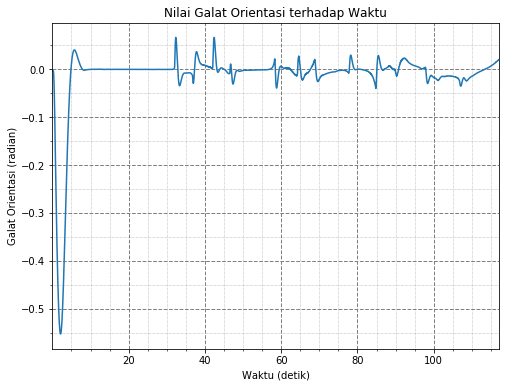

In [8]:
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[:,2],data_log[:,13])
plt.xlim(np.min(data_log[:,2]),np.max(data_log[:,2]))
plt.title('Nilai Galat Orientasi terhadap Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Galat Orientasi (radian)')
gr.yaxis.set_minor_locator(MultipleLocator(0.05))
gr.xaxis.set_minor_locator(MultipleLocator(5))
gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')
plt.show()

### Indeks Performansi

In [9]:
# Index of the calculated variable in data_log
idx = 13
idx_s = 0
idx_e = len(data_log[:, idx])

# Integral Absolute Error
iae = np.sum(np.abs(data_log[idx_s:idx_e, idx]))
print('IAE =', iae)

# Integral Square Error
ise = np.sum(np.square(data_log[idx_s:idx_e, idx]))
print('ISE =', ise)

# Integral Time Absolute Error
itae = np.sum(np.abs(data_log[idx_s:idx_e, idx]) * data_log[idx_s:idx_e, 2])
print('ITAE =', itae)

# Rise Time
rt_idx = 0
k = idx_s
for j in range(len(data_log[idx_s:idx_e, idx]) - 1):
    i = k + j
    if ((data_log[i, idx] * data_log[i+1, idx]) < 0):
        rt_idx = i
        break
print('Rise time =', data_log[i,2])

# Settling Time
ts = 0
ts1 = 0
ts2 = 0
settling_threshold = 0.3
k = idx_s
for j in range(len(data_log[:580,12]) - 1):
    i = j + k
    if (data_log[i, idx] > 0):
        if (data_log[i+1, idx] > data_log[i, idx]):
            ts1 = i
        else:
            if i > (ts1+3) and data_log[ts1, idx] < settling_threshold:
                ts = ts1
                break
    if (data_log[i, idx] < 0):
        if (data_log[i+1, idx] < data_log[i, idx]):
            ts2 = i
        else:
            if i > (ts2+3) and data_log[ts2, idx] > settling_threshold:
                ts = ts2
                break
if ts > 0:
    print('Settling time =',data_log[ts, 2])
else:
    print('Settling time = (not found)')

IAE = 71.08413904410406
ISE = 18.197150539510396
ITAE = 2137.2104905507576
Rise time = 4.867000000000001
Settling time = 5.725


## Galat Kelajuan
### Perbandingan Aktual dan Referensi

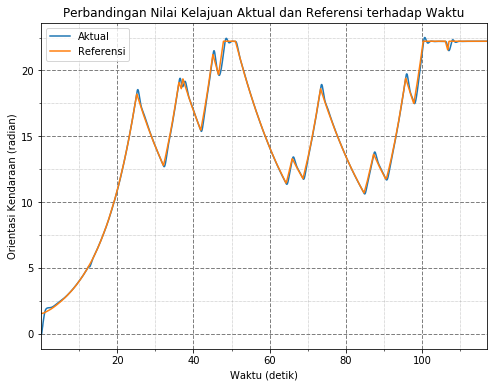

In [10]:
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[:,2], data_log[:,3], label='Aktual')
gr.plot(data_log[:,2], data_log[:,17], label='Referensi')
plt.legend(loc='upper left')
gr.yaxis.set_minor_locator(MultipleLocator(2.5))
gr.xaxis.set_minor_locator(MultipleLocator(10))
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')
gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
plt.xlim(np.min(data_log[:,2]), np.max(data_log[:,2]))
plt.xlabel('Waktu (detik)')
plt.ylabel('Orientasi Kendaraan (radian)')
plt.title('Perbandingan Nilai Kelajuan Aktual dan Referensi terhadap Waktu')
plt.show()

### Grafik Nilai Galat

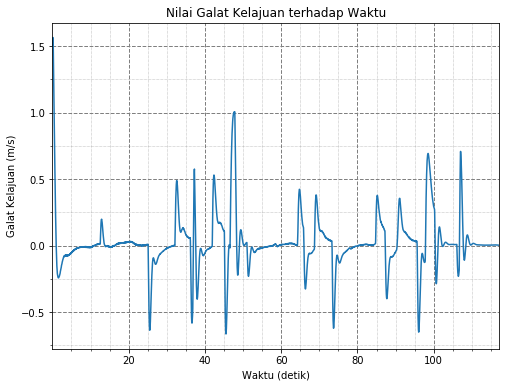

In [11]:
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[:,2],data_log[:,11])
plt.xlim(np.min(data_log[:,2]),np.max(data_log[:,2]))
plt.title('Nilai Galat Kelajuan terhadap Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Galat Kelajuan (m/s)')
gr.yaxis.set_minor_locator(MultipleLocator(0.25))
gr.xaxis.set_minor_locator(MultipleLocator(5))
gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')
plt.show()

### Indeks Performansi

In [12]:
# Index of the calculated variable in data_log
idx = 11
idx_s = 0
idx_e = len(data_log[:, idx])

# Integral Absolute Error
iae = np.sum(np.abs(data_log[idx_s:idx_e, idx]))
print('IAE =', iae)

# Integral Square Error
ise = np.sum(np.square(data_log[idx_s:idx_e, idx]))
print('ISE =', ise)

# Integral Time Absolute Error
itae = np.sum(np.abs(data_log[idx_s:idx_e, idx]) * data_log[idx_s:idx_e, 2])
print('ITAE =', itae)

# Rise Time
rt_idx = 0
k = idx_s
for j in range(len(data_log[idx_s:idx_e, idx]) - 1):
    i = k + j
    if ((data_log[i, idx] * data_log[i+1, idx]) < 0):
        rt_idx = i
        break
print('Rise time =', data_log[i,2])

# Settling Time
ts = 0
ts1 = 0
ts2 = 0
settling_threshold = 0.3
k = idx_s
for j in range(len(data_log[:580,12]) - 1):
    i = j + k
    if (data_log[i, idx] > 0):
        if (data_log[i+1, idx] > data_log[i, idx]):
            ts1 = i
        else:
            if i > (ts1+3) and data_log[ts1, idx] < settling_threshold:
                ts = ts1
                break
    if (data_log[i, idx] < 0):
        if (data_log[i+1, idx] < data_log[i, idx]):
            ts2 = i
        else:
            if i > (ts2+3) and data_log[ts2, idx] > settling_threshold:
                ts = ts2
                break
if ts > 0:
    print('Settling time =',data_log[ts, 2])
else:
    print('Settling time = (not found)')

IAE = 398.50603901557173
ISE = 163.68073448888828
ITAE = 23155.893029372415
Rise time = 0.9729999999999999
Settling time = 11.665


## Gabungan Galat Orientasi dan Galat Posisi Lateral

### Respon Karakeristik Pengontrol

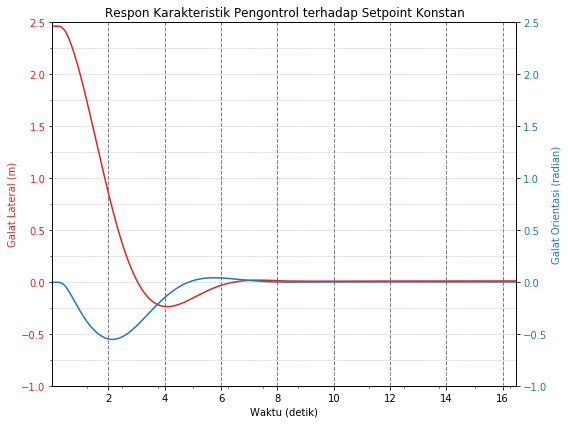

In [13]:
idx_s = 0
idx_e = 500

# Galat Posisi Lateral
fig = plt.figure(figsize=(8,6))
gr = fig.add_subplot(1,1,1)
gr.plot(data_log[idx_s:idx_e,2], data_log[idx_s:idx_e,12], color='tab:red')
plt.xlim(np.min(data_log[idx_s:idx_e,2]), np.max(data_log[idx_s:idx_e,2]))
plt.ylim(-1., 2.5)
plt.title('Respon Karakteristik Pengontrol terhadap Setpoint Konstan')
plt.xlabel('Waktu (detik)')
color = 'tab:red'
gr.set_ylabel('Galat Lateral (m)', color=color)
gr.tick_params(axis='y', labelcolor=color)
# plt.ylabel('Galat Lateral (m)')
gr.yaxis.set_minor_locator(MultipleLocator(0.25))
gr.xaxis.set_minor_locator(MultipleLocator(1.25))
gr.grid(color='grey', linestyle='--', linewidth=1, axis='x')
gr.grid(color='grey', linestyle=':', linewidth=0.5, which='both', axis='y')
# gr.axvline(3.109, linestyle='--', color='k') # vertical line to mark settling time and rise time
# plt.show()

# Galat Orientasi
# fig = plt.figure(figsize=(8,6))
# gr = fig.add_subplot(1,1,1)
color = 'tab:blue'
gr1 = gr.twinx() 
gr1.plot(data_log[idx_s:idx_e,2], data_log[idx_s:idx_e,13], color='tab:blue')
gr1.set_ylim(-1., 2.5)
gr1.set_ylabel('Galat Orientasi (radian)', color=color)
gr1.tick_params(axis='y', labelcolor=color)
# gr1.grid(color=color, linestyle=':', linewidth=0.5)
# plt.xlim(np.min(data_log[:,2]),np.max(data_log[:,2]))
# plt.title('Nilai Galat Orientasi terhadap Waktu')
# plt.xlabel('Waktu (detik)')
# plt.ylabel('Galat Orientasi (radian)')
# gr.yaxis.set_minor_locator(MultipleLocator(0.05))
# gr.xaxis.set_minor_locator(MultipleLocator(5))
# gr.grid(color='grey', linestyle='--', linewidth=1, which='major')
# gr.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')

fig.tight_layout()
plt.show()

### Indeks Performansi

In [14]:
# Index of the calculated variable in data_log
idx = 12 # error lateral
idx2 = 13 # error orientasi
idx_s = 0
idx_e = 500

# Integral Absolute Error
iae = np.sum(np.abs(data_log[idx_s:idx_e, idx])) + np.sum(np.abs(data_log[idx_s:idx_e, idx2]))
print('IAE =', iae)

# Integral Square Error
ise = np.sum(np.square(data_log[idx_s:idx_e, idx])) + np.sum(np.square(data_log[idx_s:idx_e, idx2]))
print('ISE =', ise)

# Integral Time Absolute Error
itae = np.sum(np.abs(data_log[idx_s:idx_e, idx]) * data_log[idx_s:idx_e, 2]) \
        + np.sum(np.abs(data_log[idx_s:idx_e, idx2]) * data_log[idx_s:idx_e, 2])
print('ITAE =', itae)

IAE = 187.26397293661896
ISE = 258.65230144933054
ITAE = 330.36589666194317
